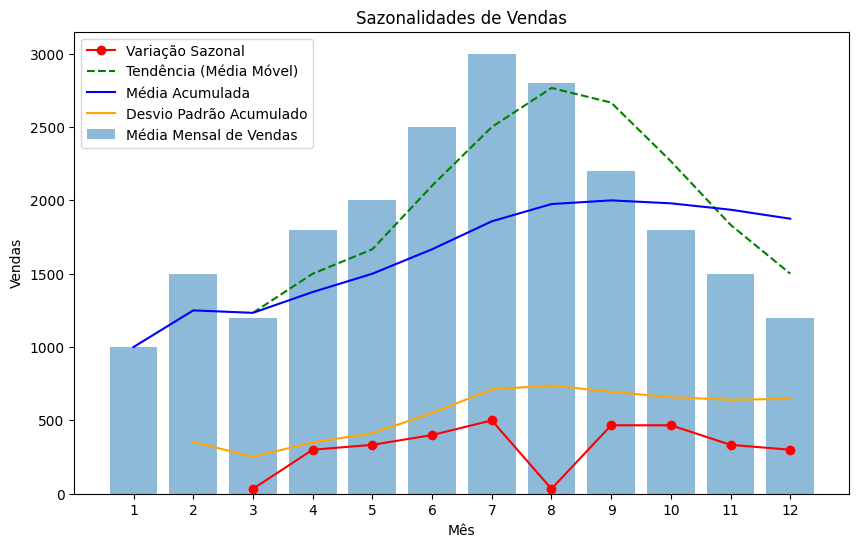

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
data = {
    'Data': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
    'Vendas': [1000, 1500, 1200, 1800, 2000, 2500, 3000, 2800, 2200, 1800, 1500, 1200]
}

# Criar DataFrame
df = pd.DataFrame(data)
df['Data'] = pd.to_datetime(df['Data'])
df = df.set_index('Data')

# Calcular a média móvel dos dados
window = 3  # Número de períodos para calcular a média móvel
df['Tendencia'] = df['Vendas'].rolling(window).mean()

# Calcular a média acumulada dos dados
df['MediaAcumulada'] = df['Vendas'].expanding().mean()

# Calcular o desvio padrão acumulado dos dados
df['DesvioPadraoAcumulado'] = df['Vendas'].expanding().std()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plotar as médias mensais de vendas
ax.bar(df.index.month, df['Vendas'], align='center', alpha=0.5, label='Média Mensal de Vendas')

# Plotar a variação sazonal
ax.plot(df.index.month, abs(df['Vendas'] - df['Tendencia']), marker='o', color='red', label='Variação Sazonal')

# Plotar a linha de tendência (média móvel)
ax.plot(df.index.month, df['Tendencia'], linestyle='--', color='green', label='Tendência (Média Móvel)')

# Plotar a média acumulada
ax.plot(df.index.month, df['MediaAcumulada'], linestyle='-', color='blue', label='Média Acumulada')

# Plotar o desvio padrão acumulado
ax.plot(df.index.month, df['DesvioPadraoAcumulado'], linestyle='-', color='orange', label='Desvio Padrão Acumulado')

plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Sazonalidades de Vendas')
plt.xticks(range(1, 13))
plt.legend()
plt.show()
